# Problem Definition: Predicting LOSH and Identifying Key Factors

## Problem Statement
The goal of this project is to build predictive models that can accurately estimate LOSH (Length of Stay in Hospital) for patients. Additionally, I aim to identify the factors that have the most significant impact on LOSH.

## Dataset
I am working with a dataset that contains various features related to patients' characteristics and their hospital stays. The dataset includes alot of information but my features columns arevage, gender, BMI, number of days on oxygen, respiratory rate, days on a ventilator, and the target variable LOSH.

## Approach
1. **Data Preprocessing:** I begin by cleaning the dataset, handling missing values, and ensuring that the data is in a suitable format for analysis.

2. **Exploratory Data Analysis (EDA):** Before building predictive models, explore the dataset to gain insights into the relationships between different features and LOSH. EDA helps  identify potential correlations and patterns.

3. **Model Building:** Build several regression models including Linear Regression, SVR, K-Nearest Neighbors, and Random Forest Regressor. These models will predict LOSH.

4. **Model Evaluation:** Evaluate the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 score. These metrics helps to compare the models performance.

5. **Feature Importance Analysis:** For the best-performing model,I analyze feature importance scores to identify which factors have the most significant impact on predicting LOSH.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
data = pd.read_excel("Health_Care_datal.xlsx", sheet_name='Sheet1')


In [4]:
data.head()

,MRN,case 1,age,gender,BMI,DOA,DM,Htn,CAD,prior lung,...,no days O2,days on HF O2,no BIPAP,days vent,Trach day,LOSICU,LOSH,died,APACHE,sofa score
0,920638442,1,57,1.0,24.30,2020-04-08 00:00:00,1,0,0,0.0,...,3.0,0.0,0.0,19,NaN,19.0,30.0,1.0,27.0,7.0
1,106651722,1,38,1.0,25.16,2020-04-12 00:00:00,0,0,0,0.0,...,1.0,0.0,0.0,55,37.0,57.0,57.0,0.0,21.0,11.0
2,920664142,1,47,1.0,30.80,2020-04-14 00:00:00,0,0,0,0.0,...,0.0,0.0,0.0,14,NaN,21.0,26.0,0.0,19.0,9.0
3,920380326,1,24,1.0,23.40,2020-04-16 00:00:00,0,0,0,0.0,...,0.0,0.0,0.0,112,NaN,166.0,296.0,0.0,20.0,8.0
4,920675112,1,55,1.0,31.20,2020-04-21 00:00:00,1,0,0,0.0,...,2.0,4.0,0.0,23,NaN,23.0,29.0,1.0,27.0,9.0


In [5]:
data.columns

Index(['MRN', 'case 1 ', 'age', 'gender', 'BMI', 'DOA', 'DM', 'Htn', 'CAD',
       'prior lung', 'COPD', 'immune sup', 'smokers', 'alcohol', 'O2 on adm',
       'NRB mask', 'high flow', 'bipap', 'mech vent', 'pressers', 'dialysis',
       'Steroids', 'Tociluzimab', 'sedatives', 'rcotics', 'paralytics',
       'ferritin', 'crp', 'infilt', 'PM subcut', 'pneumothorax ',
       'sub cut emphy', 'PM+PTX bo', 'day no of PM/PTX', 'mode Vent', 'plat p',
       'Resp rate', 'tidal volume', 'PEEP', 'recruit', 'no days O2',
       'days on HF O2', 'no BIPAP', 'days vent', 'Trach day', 'LOSICU', 'LOSH',
       'died', 'APACHE', 'sofa score'],
      dtype='object')

### Selecting feature and Target columns (as assigned )

In [5]:
df = data[["age", "gender", "BMI", "no days O2", "Resp rate", "days vent", "LOSH"]]


In [6]:
df

,age,gender,BMI,no days O2,Resp rate,days vent,LOSH
0,57,1.0,24.30,3.0,20,19,30.0
1,38,1.0,25.16,1.0,22,55,57.0
2,47,1.0,30.80,0.0,22,14,26.0
3,24,1.0,23.40,0.0,24,112,296.0
4,55,1.0,31.20,2.0,32,23,29.0
...,...,...,...,...,...,...,...
371,61,1.0,29.70,0.0,NaN,1,2.0
372,41,1.0,34.00,3.0,20,27,34.0
373,77,0.0,33.30,0.0,16,20,29.0
374,53,1.0,32.00,1.0,20,15,16.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         376 non-null    int64  
 1   gender      375 non-null    float64
 2   BMI         353 non-null    float64
 3   no days O2  375 non-null    float64
 4   Resp rate   309 non-null    object 
 5   days vent   376 non-null    int64  
 6   LOSH        371 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.7+ KB


### Data Preprocessing

In [8]:
df['Resp rate'].unique()

array([20, 22, 24, 32, 36, 30, 25, 26, 18, 14, 16, nan, 28, 35, 27, 17,
       15, 10, 33, 'NM', 34, 38, 48, 12, 21, 2, 40], dtype=object)

In [9]:
# filling NaN values with 0 
df['Resp rate'].replace('NM', 0, inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13380\503037207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resp rate'].replace('NM', 0, inplace = True)


In [10]:
df['Resp rate'].unique()

array([20., 22., 24., 32., 36., 30., 25., 26., 18., 14., 16., nan, 28.,
       35., 27., 17., 15., 10., 33.,  0., 34., 38., 48., 12., 21.,  2.,
       40.])

In [11]:
df.dtypes

age             int64
gender        float64
BMI           float64
no days O2    float64
Resp rate     float64
days vent       int64
LOSH          float64
dtype: object

In [12]:
# Viewing null values with each column
df.isna().sum()

age            0
gender         1
BMI           23
no days O2     1
Resp rate     67
days vent      0
LOSH           5
dtype: int64

In [13]:
# filling gender column
mode_value = df['gender'].mode()[0]
mode_value

1.0

In [14]:
df['gender'] = df['gender'].fillna(mode_value)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13380\2018511643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].fillna(mode_value)


In [15]:
df['gender'].value_counts()

1.0    290
0.0     86
Name: gender, dtype: int64

In [16]:
# filling no days O2
mode_value = df['no days O2'].mode()[0]
mode_value

0.0

In [17]:
df['no days O2'] = df['no days O2'].fillna(mode_value)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13380\2404986695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no days O2'] = df['no days O2'].fillna(mode_value)


In [18]:
df.isna().sum()

age            0
gender         0
BMI           23
no days O2     0
Resp rate     67
days vent      0
LOSH           5
dtype: int64

In [19]:
df.loc[:, ('Age_Category')]=pd.cut(df.loc[:, ('age')],bins=[0, 18, 30, 45, 60, 75, 100], labels=['0-18', '19-30', '31-45', '46-60','61-75', '76+'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13380\1874751331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ('Age_Category')]=pd.cut(df.loc[:, ('age')],bins=[0, 18, 30, 45, 60, 75, 100], labels=['0-18', '19-30', '31-45', '46-60','61-75', '76+'])


In [20]:
df['Age_Category'].value_counts()

46-60    144
31-45    103
61-75     89
76+       21
19-30     19
0-18       0
Name: Age_Category, dtype: int64

In [21]:
df[['Age_Category','gender', 'Resp rate']].groupby(by=['Age_Category', 'gender']).mean()

Resp rate
Age_Category gender           
0-18         0.0           NaN
             1.0           NaN
19-30        0.0     17.500000
             1.0     26.384615
31-45        0.0     24.625000
             1.0     26.117647
46-60        0.0     24.809524
             1.0     24.567308
61-75        0.0     23.894737
             1.0     24.818182
76+          0.0     22.375000
             1.0     27.750000

In [22]:
# For 'Age_Category' == '19-30' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 0.0), 'BMI'] = df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 0.0), 'BMI'].fillna(28.24)

# For 'Age_Category' == '19-30' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 1.0), 'BMI'] = df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 1.0), 'BMI'].fillna(32.14)

# For 'Age_Category' == '31-45' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 0.0), 'BMI'] = df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 0.0), 'BMI'].fillna(31.71)

# For 'Age_Category' == '31-45' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 1.0), 'BMI'] = df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 1.0), 'BMI'].fillna(28.66)

# For 'Age_Category' == '46-60' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 0.0), 'BMI'] = df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 0.0), 'BMI'].fillna(34.08)

# For 'Age_Category' == '46-60' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 1.0), 'BMI'] = df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 1.0), 'BMI'].fillna(30.19)

# For 'Age_Category' == '61-75' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 0.0), 'BMI'] = df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 0.0), 'BMI'].fillna(33.16)

# For 'Age_Category' == '61-75' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 1.0), 'BMI'] = df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 1.0), 'BMI'].fillna(29.94)

# For 'Age_Category' == '76+' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 0.0), 'BMI'] = df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 0.0), 'BMI'].fillna(27.72)

# For 'Age_Category' == '76+' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 1.0), 'BMI'] = df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 1.0), 'BMI'].fillna(29.32)


In [23]:
df.isna().sum()

age              0
gender           0
BMI              0
no days O2       0
Resp rate       67
days vent        0
LOSH             5
Age_Category     0
dtype: int64

In [24]:
df[['Age_Category','gender', 'Resp rate']].groupby(by=['Age_Category', 'gender']).mean()

Resp rate
Age_Category gender           
0-18         0.0           NaN
             1.0           NaN
19-30        0.0     17.500000
             1.0     26.384615
31-45        0.0     24.625000
             1.0     26.117647
46-60        0.0     24.809524
             1.0     24.567308
61-75        0.0     23.894737
             1.0     24.818182
76+          0.0     22.375000
             1.0     27.750000

In [25]:
# For 'Age_Category' == '19-30' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 0.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 0.0), 'Resp rate'].fillna(17.50)

# For 'Age_Category' == '19-30' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 1.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '19-30') & (df['gender'] == 1.0), 'Resp rate'].fillna(26.38)

# For 'Age_Category' == '31-45' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 0.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 0.0), 'Resp rate'].fillna(24.62)

# For 'Age_Category' == '31-45' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 1.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '31-45') & (df['gender'] == 1.0), 'Resp rate'].fillna(26.11)

# For 'Age_Category' == '46-60' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 0.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 0.0), 'Resp rate'].fillna(24.80)

# For 'Age_Category' == '46-60' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 1.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '46-60') & (df['gender'] == 1.0), 'Resp rate'].fillna(24.56)

# For 'Age_Category' == '61-75' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 0.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 0.0), 'Resp rate'].fillna(23.89)

# For 'Age_Category' == '61-75' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 1.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '61-75') & (df['gender'] == 1.0), 'Resp rate'].fillna(24.81)

# For 'Age_Category' == '76+' and 'gender' == 0.0
df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 0.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 0.0), 'Resp rate'].fillna(22.37)

# For 'Age_Category' == '76+' and 'gender' == 1.0
df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 1.0), 'Resp rate'] = df.loc[(df['Age_Category'] == '76+') & (df['gender'] == 1.0), 'Resp rate'].fillna(27.75)


In [26]:
df.isna().sum()

age             0
gender          0
BMI             0
no days O2      0
Resp rate       0
days vent       0
LOSH            5
Age_Category    0
dtype: int64

In [27]:
df['LOSH'].fillna(df['LOSH'].mean(), inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13380\4139337239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOSH'].fillna(df['LOSH'].mean(), inplace = True)


In [28]:
df.isna().sum()

age             0
gender          0
BMI             0
no days O2      0
Resp rate       0
days vent       0
LOSH            0
Age_Category    0
dtype: int64

In [29]:
df[df['LOSH'] == 0]

,age,gender,BMI,no days O2,Resp rate,days vent,LOSH,Age_Category
321,63,1.0,27.34,0.0,30.0,7,0.0,61-75


### EDA

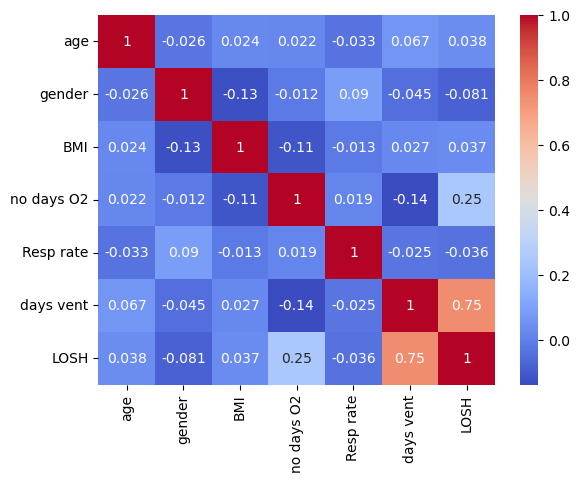

In [30]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.show()

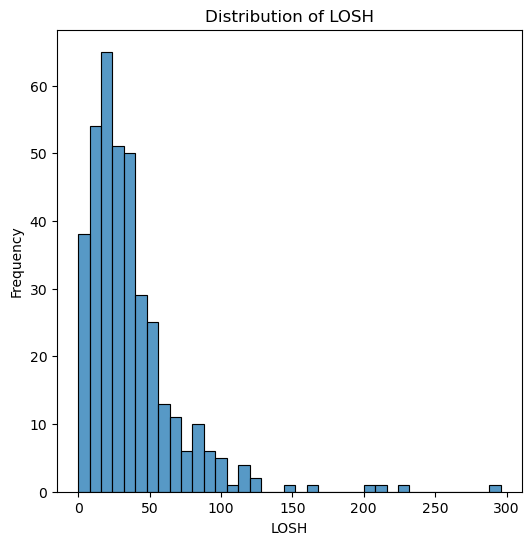

In [31]:
# Distribution of the Target Variable (LOSH)
plt.figure(figsize=(6,6))
sns.histplot(data=df, x="LOSH")
plt.title("Distribution of LOSH")
plt.xlabel("LOSH")
plt.ylabel("Frequency")
plt.show()

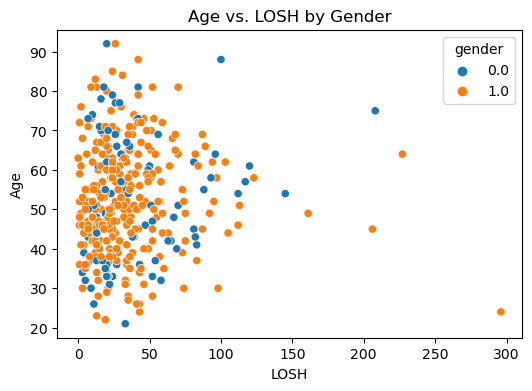

In [32]:
# Plot Age vs. LOSH (0 = Women, 1 = Men)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="LOSH", y="age", hue="gender")
plt.title("Age vs. LOSH by Gender")
plt.xlabel("LOSH")
plt.ylabel("Age")
plt.show()

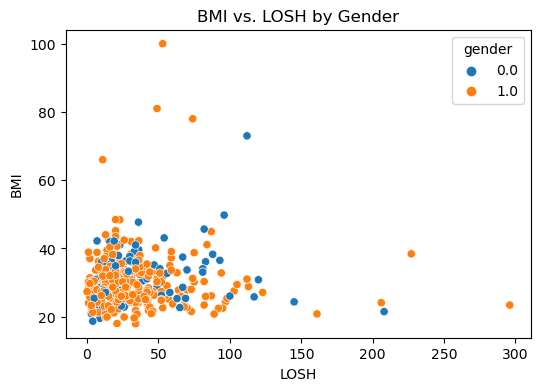

In [33]:
# Plot Age vs. LOSH (0 = Women, 1 = Men)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="LOSH", y="BMI", hue="gender")
plt.title("BMI vs. LOSH by Gender")
plt.xlabel("LOSH")
plt.ylabel("BMI")
plt.show()

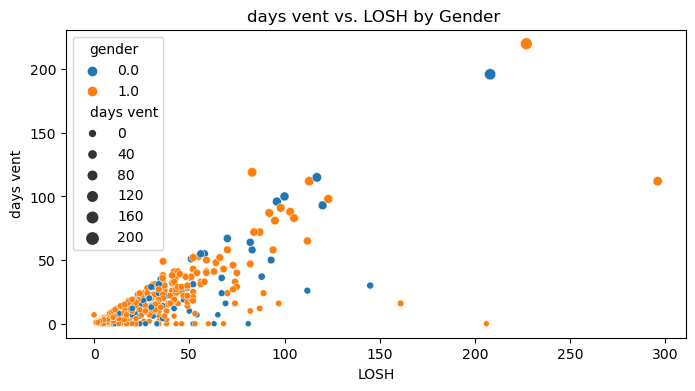

In [34]:
# Plot Age vs. LOSH (0 = Women, 1 = Men)
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="LOSH", y="days vent", size = "days vent", hue  = "gender")
plt.title("days vent vs. LOSH by Gender ")
plt.xlabel("LOSH")
plt.ylabel("days vent")
plt.show()

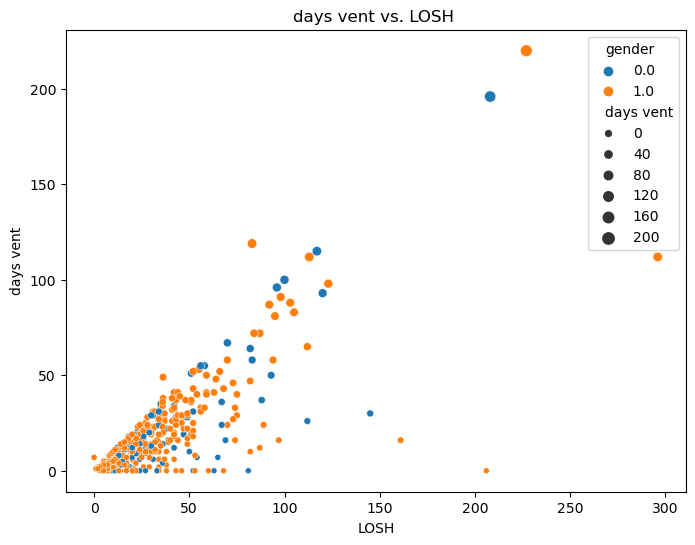

In [35]:
# Plot Age vs. LOSH (0 = Women, 1 = Men)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="LOSH", y="days vent", size = "days vent",  hue = "gender")
plt.title("days vent vs. LOSH ")
plt.xlabel("LOSH")
plt.ylabel("days vent")
plt.show()

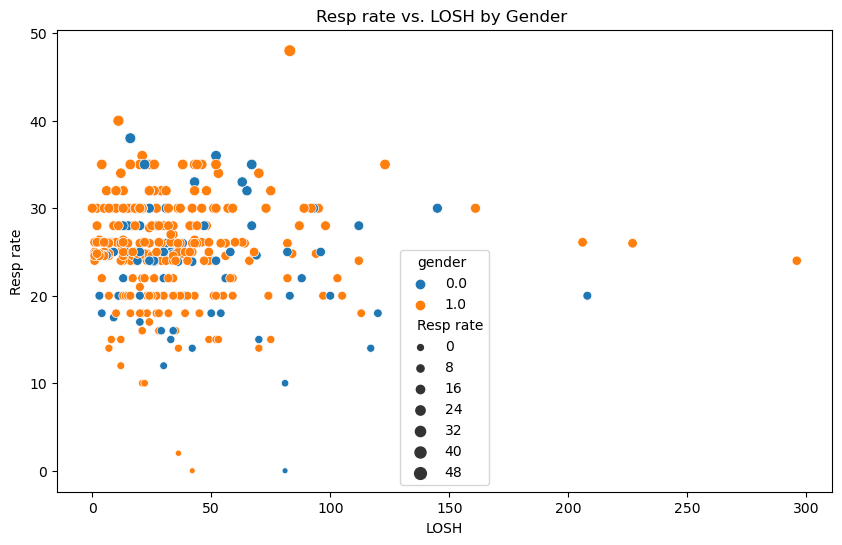

In [36]:
# Plot Age vs. LOSH (0 = Women, 1 = Men)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="LOSH", y="Resp rate", size = "Resp rate", hue = "gender")
plt.title("Resp rate vs. LOSH by Gender ")
plt.xlabel("LOSH")
plt.ylabel("Resp rate")
plt.show()

In [37]:
df['LOSH'].value_counts()

20.0     14
13.0     13
34.0     12
24.0     12
21.0     11
         ..
98.0      1
60.0      1
206.0     1
88.0      1
45.0      1
Name: LOSH, Length: 101, dtype: int64

### Machine Learning Algorithms and Evaluation Metrics:

#### Splitting data

In [38]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = df.drop(["LOSH", 'Age_Category'], axis=1)
y = df["LOSH"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 6), (300,), (76, 6), (76,))

### 1. Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

array([ 36.95360735,  29.24584035,  22.63550324,  20.71843535,
        17.04237397,  52.89869139,  22.51514271,  36.13949234,
        22.55146797,  48.35904792,  33.75913737,  27.10387566,
        69.20125623,  45.35482033,  13.13782429,  25.27214446,
        13.48944667,  50.95434398,  28.09450223,  24.5248981 ,
        27.10893408,  40.11505253,  49.7348314 ,  32.51465371,
       206.43571536, 107.96677876,  29.2897778 ,  27.41925843,
        80.68918715,  16.36058728,  12.98326346,  11.76162111,
        65.40156836,  39.06174047,  14.53485321,  16.26833422,
        38.8317991 ,  37.83129934,  22.64271614,  16.91520385,
        22.87432535,  19.66017514,  12.15564811,  83.06216975,
        28.35607855,  10.37075613,  27.67480032,  93.31228455,
        28.44372953,  51.865896  ,  15.02526803,  91.51773054,
        11.41326448,  35.05422103,  22.11063164,  45.3476091 ,
        39.64415015,  19.79891924,  31.76814937,  16.25421814,
        14.76953372,  51.3244806 ,  47.13911423, 119.07

In [64]:
# Access coefficients and intercept
coefficients = lr_model.coef
intercept = lr_model.intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.00851888 -1.97204476  0.13827166  1.45994565  0.02655025  0.9810483 ]
Intercept: 7.090361361146186


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [42]:
print("Linear Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)
print()

Linear Regression:
MAE: 13.111710447368372
MSE: 648.0827680270316
RMSE: 25.457469788394754
R2 Score: 0.691637889688296



### 2. Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)


In [66]:
# Feature importance (Random Forest)
feature_importances = rf_model.feature_importances_
print("Random Forest Feature Importances:", feature_importances)

Random Forest Feature Importances: [0.04458449 0.01081662 0.10453828 0.18128714 0.06306642 0.59570706]


In [44]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)
print()

Random Forest Regressor:
MAE: 13.111710447368372
MSE: 648.0827680270316
RMSE: 25.457469788394754
R2 Score: 0.691637889688296



### 3. Support Vector Regressor

In [45]:
from sklearn.svm import SVR

# Create an SVR model
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)


In [46]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)
print()

Support Vector Regression:
MAE: 13.111710447368372
MSE: 648.0827680270316
RMSE: 25.457469788394754
R2 Score: 0.691637889688296



### 4. K Neighbors Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)


In [48]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)
print()

K-Nearest Neighbors (KNN) Regression:
MAE: 13.111710447368372
MSE: 648.0827680270316
RMSE: 25.457469788394754
R2 Score: 0.691637889688296



### Feature Importance

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Print or visualize the feature importances
print(feature_importances)


[0.0487118  0.01188036 0.11207116 0.16838413 0.06361767 0.59533488]


From the results above it is shown that the **'days vent' (number of days on a ventilator)** 

feature has the highest importance score, followed by **'no of days O2' (number of days on oxygen)**,

**'BMI', 'Resp rate' (respiratory rate), 'age', and 'gender'.**

### Predicting the LOSH through dummy data:

In [49]:
!pip install joblib

In [50]:
import joblib
joblib.dump(lr_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [54]:
# Create a dummy data
dummy_data = {
    'age': [40, 50, 35, 12,18,30],
    'gender': [1, 0, 1,1,1,0],
    'BMI': [28.0, 23.5, 29.8,15.8,19.2,34.7],
    'no days O2': [2, 0, 1,10,5,8],
    'Resp rate': [25, 18, 22,16,12,28],
    'days vent': [5, 0, 2,10,5,8]
}

In [55]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(dummy_data)

# Save the DataFrame to a CSV file
df.to_csv('new_data_for_prediction.csv', index=False)

In [56]:
loaded_model = joblib.load('linear_regression_model.pkl')

# Load and preprocess the new data
new_data = pd.read_csv('new_data_for_prediction.csv')
# Preprocess new_data similar to how you preprocessed your training data

# Make predictions
predicted_losh = loaded_model.predict(new_data)

# Display the predicted LOSH values
print(predicted_losh)

[17.81956727 11.24359387 13.54312056 32.23997881 20.45004501 32.41531285]


## Conclusion:

In conclusion, through the analysis, I have developed predictive models for predicting Length of Stay in Hospital (LOSH). By evaluating the model's performance metrics and assessing feature importance, I have gained valuable insights into the factors that significantly influence LOSH. Notably, I have identified that 'days on vent' (number of days on a ventilator) emerges as the most impactful factor affecting LOSH.

Interestingly, it's worth noting that despite employing different machine learning algorithms, I have observed remarkable consistency in the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 score across all models. 